# Object detection by colour

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
image_path = 'samples/tenis.jpg'
image = cv2.imread(image_path)

In [3]:
image.shape

(540, 960, 3)

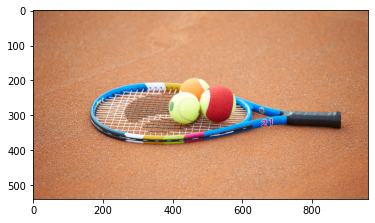

In [4]:
rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

In [5]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

In [6]:
hsv_image.shape

(540, 960, 3)

In [7]:
hue_image, saturation_image, value_image = hsv_image[:, :, 0], hsv_image[:, :, 1], hsv_image[:, :, 2]

In [8]:
print(np.min(hue_image), np.max(hue_image))
print(np.min(saturation_image), np.max(saturation_image))
print(np.min(value_image), np.max(value_image))

0 179
0 255
5 255


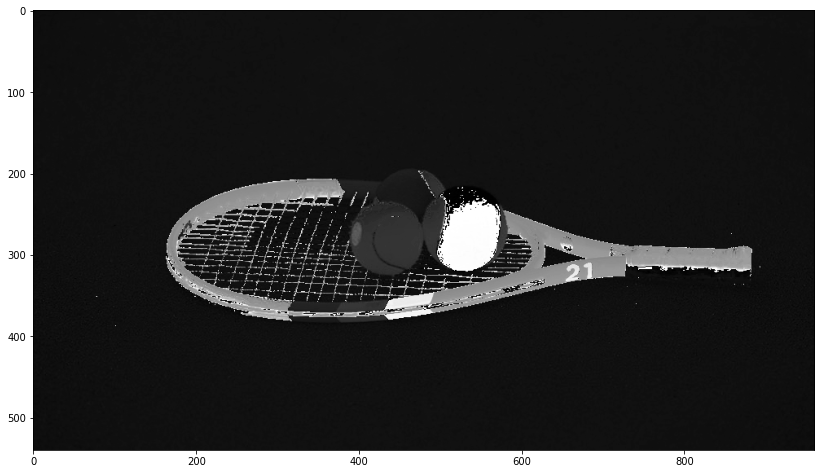

In [9]:
plt.figure(figsize=(14, 10))
plt.imshow(hue_image, cmap='gray')
plt.show()

In [10]:
hist = cv2.calcHist([hue_image], [0], None, [256], [0, 256])

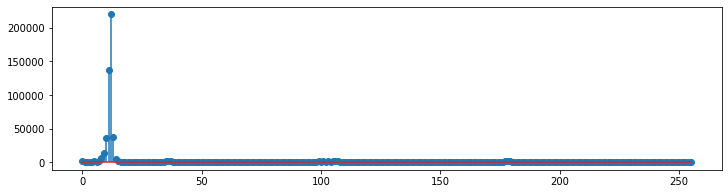

In [11]:
plt.figure(figsize=(12, 3))
plt.stem(hist)
plt.show()

In [12]:
hist = cv2.calcHist([hue_image], [0], None, [256], [0, 256])

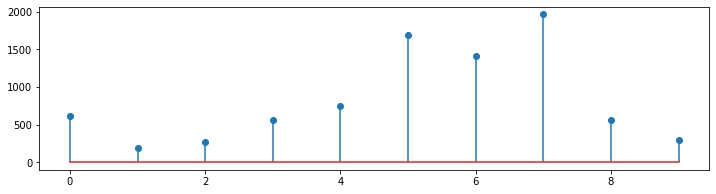

In [13]:
plt.figure(figsize=(12, 3))
plt.stem(hist[30:40])
plt.show()

## Thresholding

https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html

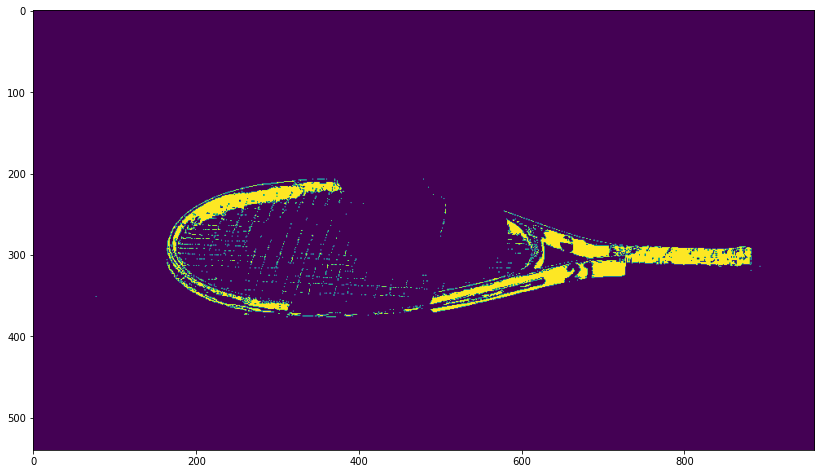

In [14]:
mask = cv2.inRange(hue_image, 100, 110)
# mask = cv2.inRange(hue_image, 30, 40)
plt.figure(figsize=(14, 10))
plt.imshow(mask)
plt.show()

## Colour distribution by mask

In [15]:
red_mask = cv2.imread('samples/tenis_mask.png')
red_mask = red_mask[:, :, 0]

In [16]:
red_mask.shape

(540, 960)

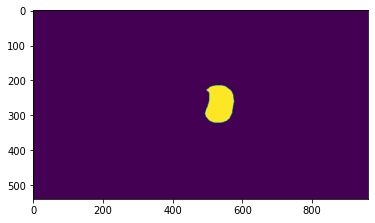

In [17]:
plt.imshow(red_mask)

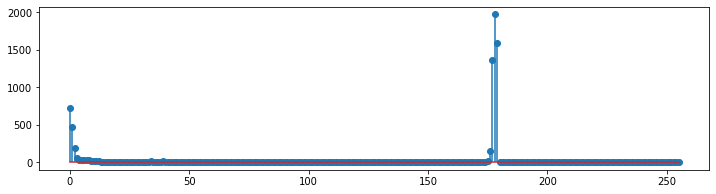

In [18]:
hue_hist = cv2.calcHist([hue_image], [0], red_mask, [256], [0, 256])
plt.figure(figsize=(12, 3))
plt.stem(hue_hist)
# plt.stem(hue_hist[170:])
plt.show()

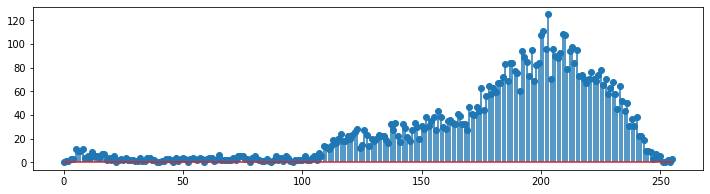

In [19]:
saturation_hist = cv2.calcHist([saturation_image], [0], red_mask, [256], [0, 256])
plt.figure(figsize=(12, 3))
plt.stem(saturation_hist)
plt.show()

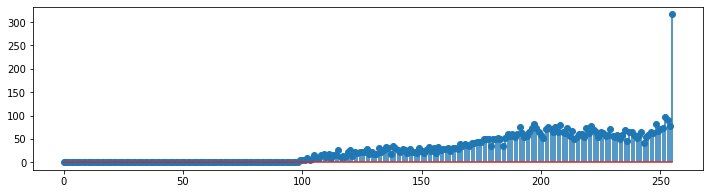

In [20]:
value_hist = cv2.calcHist([value_image], [0], red_mask, [256], [0, 256])
plt.figure(figsize=(12, 3))
plt.stem(value_hist)
plt.show()

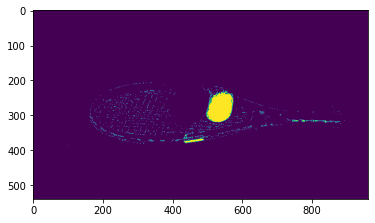

In [21]:
mask = cv2.inRange(hue_image, 170, 180)
plt.imshow(mask)

## Gaussian blur

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

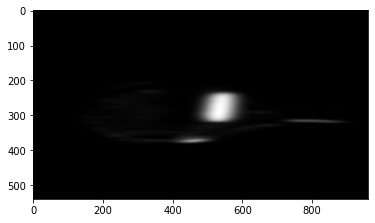

In [22]:
blur = cv2.GaussianBlur(mask, (151, 15), 0)
plt.imshow(blur, cmap='gray')

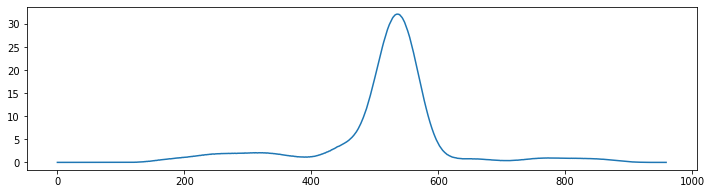

In [23]:
column_means = np.mean(blur, axis=0)
plt.figure(figsize=(12, 3))
plt.plot(column_means)
plt.show()

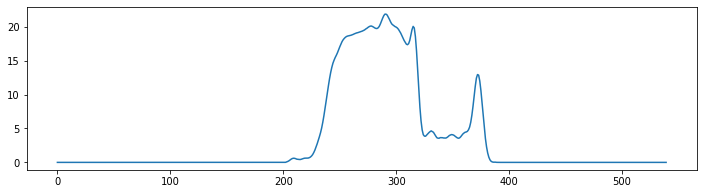

In [24]:
row_means = np.mean(blur, axis=1)
plt.figure(figsize=(12, 3))
plt.plot(row_means)
plt.show()

In [25]:
ball_position = (np.argmax(column_means), np.argmax(row_means))
print(ball_position)

(536, 291)
